In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import numpy as np
import time
from datetime import date, datetime
from matplotlib import rcParams
import sys

In [3]:
# Load the datasets
# /content/drive/MyDrive/Data/activities.csv
users_details_df = pd.read_csv('/content/drive/MyDrive/Data/user_details.csv')
trips_df = pd.read_csv('/content/drive/MyDrive/Data/trips.csv')
legs_df = pd.read_csv('/content/drive/MyDrive/Data/legs.csv')
leg_coordinates_df = pd.read_csv('/content/drive/MyDrive/Data/legs_coordinates.csv')
activities_df = pd.read_csv('/content/drive/MyDrive/Data/activities.csv')
experience_factors_df = pd.read_csv('/content/drive/MyDrive/Data/experience_factors.csv')
purposes_df = pd.read_csv('/content/drive/MyDrive/Data/purposes.csv')
weather_legs_df = pd.read_csv('/content/drive/MyDrive/Data/weather_legs.csv')
user_generic_df = pd.read_csv('/content/drive/MyDrive/Data/user_generic_worthwhileness_values.csv')
user_specific_df = pd.read_csv('/content/drive/MyDrive/Data/user_specific_worthwhileness_values.csv')
mots_df = pd.read_csv('/content/drive/MyDrive/Data/mots.csv')
weather_raw_df = pd.read_csv('/content/drive/MyDrive/Data/weather_raw.csv')
worthwhileness_df = pd.read_csv('/content/drive/MyDrive/Data/worthwhileness_elements_from_trips.csv')

<ipython-input-3-f589e177ca1d>:10: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_legs_df = pd.read_csv('/content/drive/MyDrive/Data/weather_legs.csv')


In [15]:
# List of the columns we are interested in
columns_to_describe = ['gender', 'age_range', 'lang', 'education_level', 'labour_status_household']

# Create an empty DataFrame to store the results
descriptive_stats = pd.DataFrame()

# Loop through each column and calculate the statistics
for column in columns_to_describe:

    # Frequency (counts) of each category
    counts = users_details_df[column].value_counts()

    # Percentage of each category
    percentages = users_details_df[column].value_counts(normalize=True) * 100

    # Combine the results into a DataFrame
    stats_df = pd.DataFrame({'Counts': counts, 'Percentage (%)': percentages}).reset_index()
    stats_df.columns = [column, 'Counts', 'Percentage (%)']

    # Display the results for the current column
    print(f"Descriptive Statistics for {column.replace('_', ' ').capitalize()}:")
    display(stats_df)
    print("\n" + "-"*50 + "\n")


Descriptive Statistics for Gender:


,gender,Counts,Percentage (%)
0,Male,1880,56.456456
1,Female,1435,43.093093
2,Other,15,0.450450



--------------------------------------------------

Descriptive Statistics for Age range:


,age_range,Counts,Percentage (%)
0,25-49,2036,61.141141
1,16-24,681,20.450450
2,50-64,517,15.525526
3,65+,96,2.882883



--------------------------------------------------

Descriptive Statistics for Lang:


,lang,Counts,Percentage (%)
0,eng,774,69.292748
1,cat,95,8.504924
2,slo,69,6.177261
3,fin,29,2.596240
4,dut,29,2.596240
5,nob,29,2.596240
6,fre,23,2.059087
7,por,21,1.880036
8,ita,19,1.700985
9,esp,14,1.253357



--------------------------------------------------

Descriptive Statistics for Education level:


,education_level,Counts,Percentage (%)
0,University,587,78.058511
1,High school (12th grade),138,18.351064
2,Basic (up to 10th grade),27,3.590426



--------------------------------------------------

Descriptive Statistics for Labour status household:


,labour_status_household,Counts,Percentage (%)
0,Employed full Time,654,69.648562
1,Student,149,15.867945
2,Employed part-time,91,9.691161
3,Pensioner,29,3.088392
4,Unemployed,16,1.703940



--------------------------------------------------



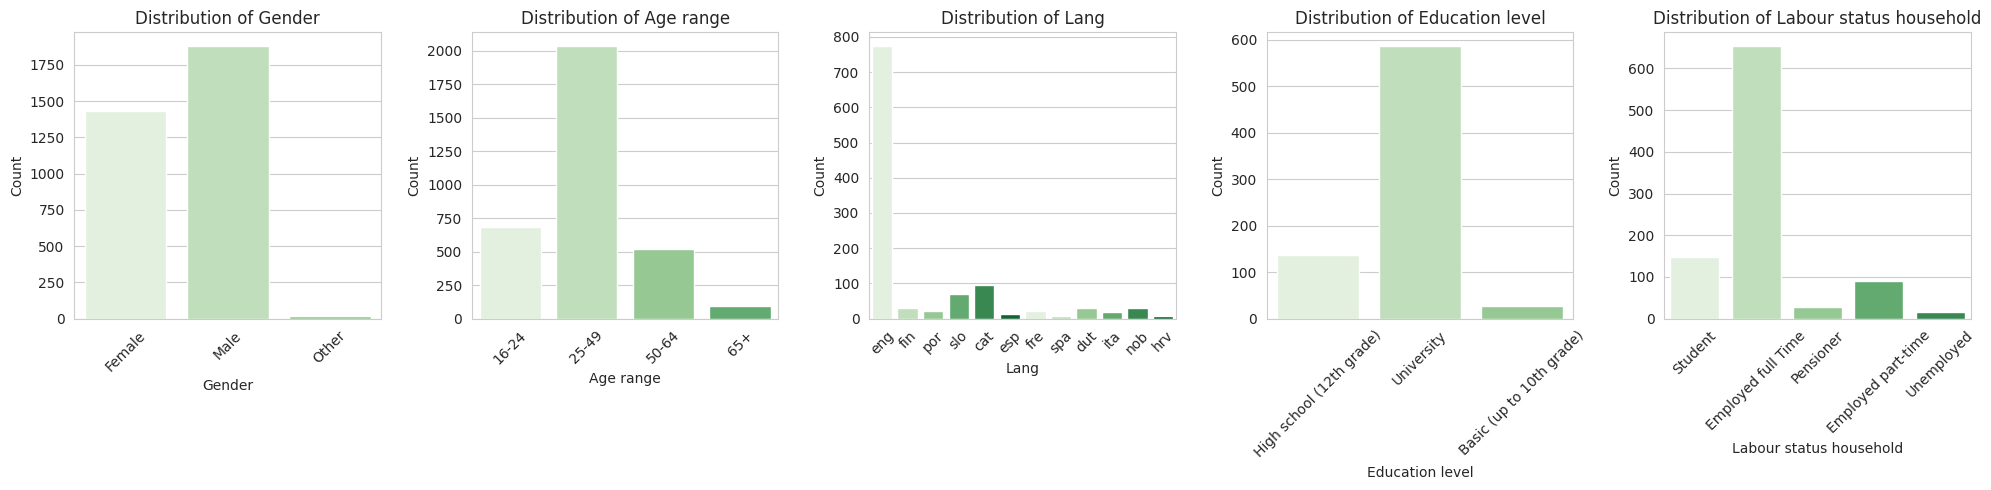

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Use a green color palette
palette = sns.color_palette("Greens")

# Define the columns to plot
columns_to_plot = ['gender', 'age_range', 'lang', 'education_level', 'labour_status_household']

# Initialize a figure
plt.figure(figsize=(20, 5))  # Adjust the figure size for vertical bars

# Iterate through the columns and create a subplot for each one
for idx, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 5, idx)  # 1x5 grid for 5 plots
    sns.countplot(data=users_details_df, x=column, palette=palette)
    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}')
    plt.ylabel('Count')
    plt.xlabel(column.replace("_", " ").capitalize())
    plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [4]:
users_details_df.columns

Index(['userid', 'registration_date', 'gender', 'age_range', 'lang', 'city',
       'country', 'education_level', 'marital_status_household',
       'number_people_household', 'labour_status_household',
       'years_of_residence_household'],
      dtype='object')

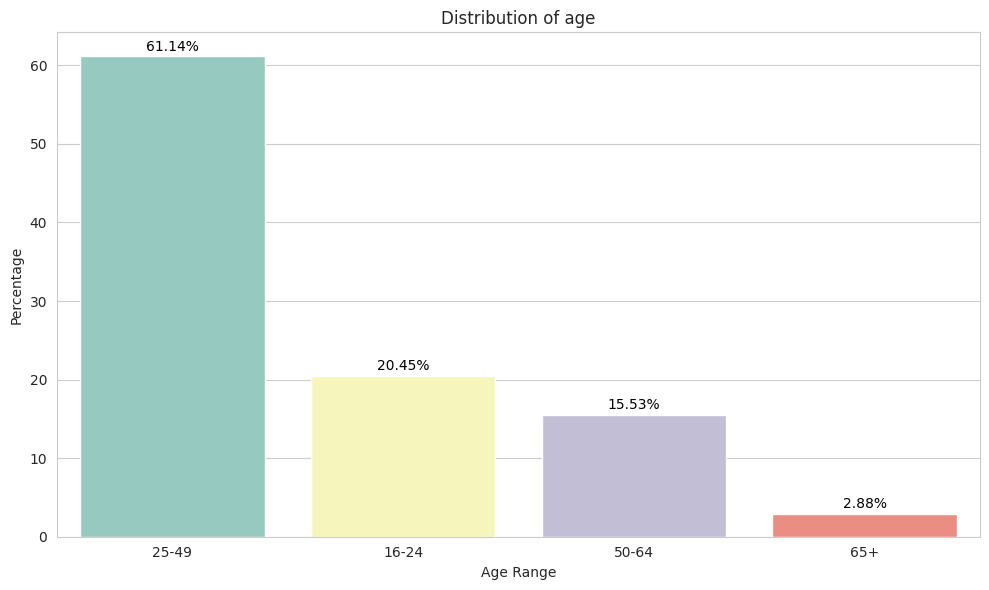

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic style
sns.set_style("whitegrid")

# Bar plot for age_range
plt.figure(figsize=(10, 6))
value_counts_age = users_details_df['age_range'].value_counts(normalize=True) * 100
sns.barplot(x=value_counts_age.index, y=value_counts_age.values, palette="Set3")
plt.title('Distribution of age')
plt.ylabel('Percentage')
plt.xlabel('Age Range')

# Annotate the bars with percentages
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.tight_layout()
plt.show()

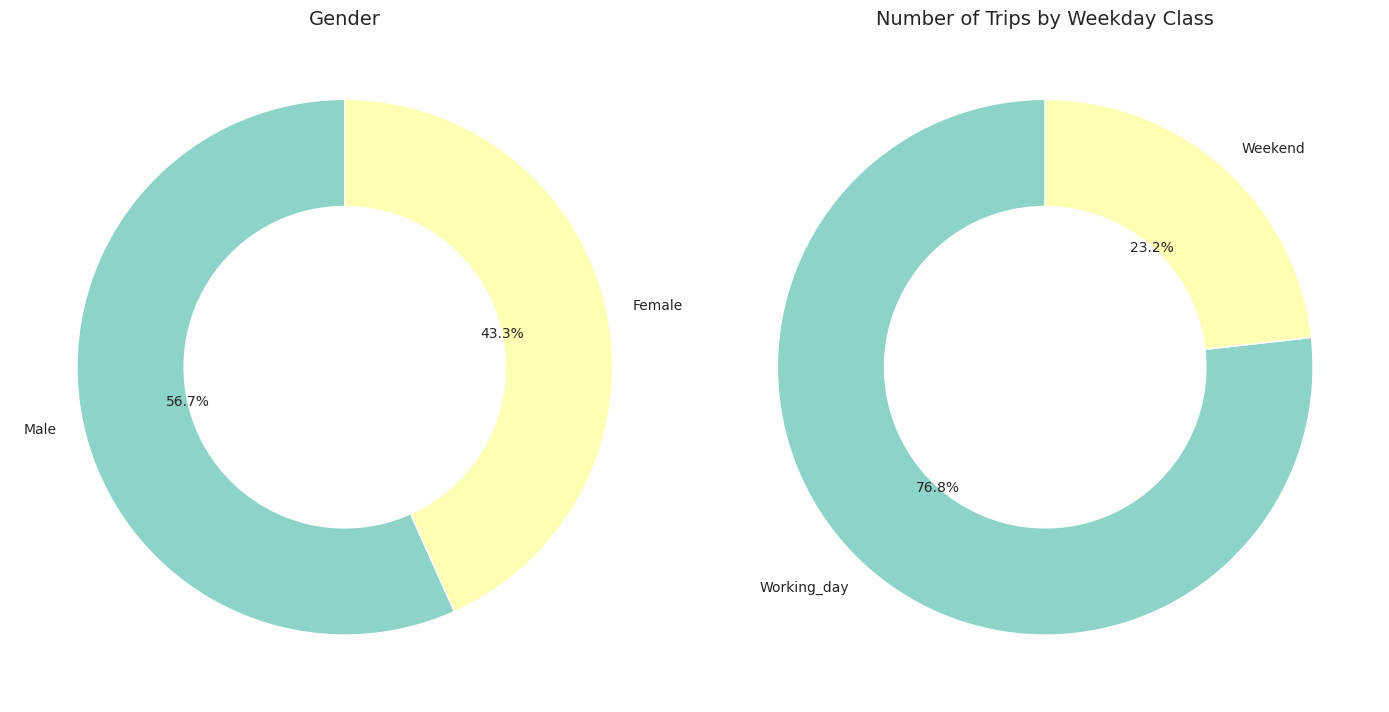

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the layout for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))  # Adjust the size and layout

# PLOT 1 - Gender Distribution
gender_counts = users_details_df[users_details_df['gender'].isin(['Male', 'Female'])]['gender'].value_counts()
wedges, texts, autotexts = axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    colors=sns.color_palette("Set3", n_colors=2)
)

centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=0)
axes[0].add_artist(centre_circle)
axes[0].set_title('Gender', fontsize=14)

# PLOT 2 - Number of Trips by Weekday Class
weekday_class_counts = legs_df['weekday_class'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    weekday_class_counts,
    labels=weekday_class_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    colors=sns.color_palette("Set3", n_colors=len(weekday_class_counts))
)

centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=0)
axes[1].add_artist(centre_circle)
axes[1].set_title('Number of Trips by Weekday Class', fontsize=14)

plt.tight_layout()
plt.show()


In [6]:
# Map displaying top 5 cities from where the users are mainly from
start_cities = leg_coordinates_df['start_name'].value_counts()
end_cities = leg_coordinates_df['end_name'].value_counts()

city_counts = start_cities.add(end_cities, fill_value=0)
top_cities = city_counts.nlargest(5)
total_trips = top_cities.sum()
top_cities_percentage = (top_cities / total_trips) * 100

# ---------------------------------------------------------
import folium

# Create a base map
m = folium.Map(location=[leg_coordinates_df['start_lat'].mean(), leg_coordinates_df['start_lon'].mean()], zoom_start=10)

# Loop through each city in 'top_cities_percentage'
for city, percentage in top_cities_percentage.items():
    # Get average latitude and longitude for the city
    avg_lat = leg_coordinates_df[leg_coordinates_df['start_name'] == city]['start_lat'].mean()
    avg_lon = leg_coordinates_df[leg_coordinates_df['start_name'] == city]['start_lon'].mean()

    # Create a label with city name and percentage
    label = f"{city} ({percentage:.2f}%)"

    folium.Marker(
        location=(avg_lat, avg_lon),
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: blue;">{label}</div>"""),
    ).add_to(m)

# Display the map
m

In [7]:
legs_df = legs_df.merge(mots_df,on='motid')
legs_df.shape

(158897, 16)

In [8]:
cattransshare = legs_df.groupby('transport_category')['leg_duration'].sum().reset_index().sort_values(by='leg_duration', ascending=False)
cattransshare.columns = ['transportCategory', 'tot_duration']
cattransshare.head()

modetransshare = legs_df.groupby('mot_text')['leg_duration'].sum().reset_index().sort_values(by='leg_duration', ascending=False)
modetransshare.columns = ['transportMode', 'tot_duration']
modetransshare.head()

modetransshare = modetransshare[modetransshare['transportMode'] != 'unknown']
modetransshare['freq'] = modetransshare['tot_duration']/modetransshare['tot_duration'].sum() *100
modetransshare['transportMode'] = modetransshare.apply(lambda x: "train" if x['transportMode'] in (['intercityTrain','highSpeedTrain']) else x['transportMode'], axis=1)
modetransshare = modetransshare.groupby('transportMode').sum().reset_index().sort_values('freq', ascending=False)
modetransshare['transportMode'] = modetransshare.apply(lambda x: x['transportMode'] if x['freq'] >= 1 else "other", axis=1)
modetransshare = modetransshare.groupby('transportMode').sum().reset_index().sort_values('freq', ascending=False)
modetransshare

,transportMode,tot_duration,freq
8,walking,5454691.891,29.937435
2,carDriver,4716212.605,25.884378
0,bicycle,3142390.188,17.246639
7,train,1757574.497,9.646241
1,bus,1436926.175,7.886400
5,other,634017.922,3.479733
3,carPassenger,470536.000,2.582482
6,subway,413516.111,2.269535
4,ferry,194439.273,1.067157


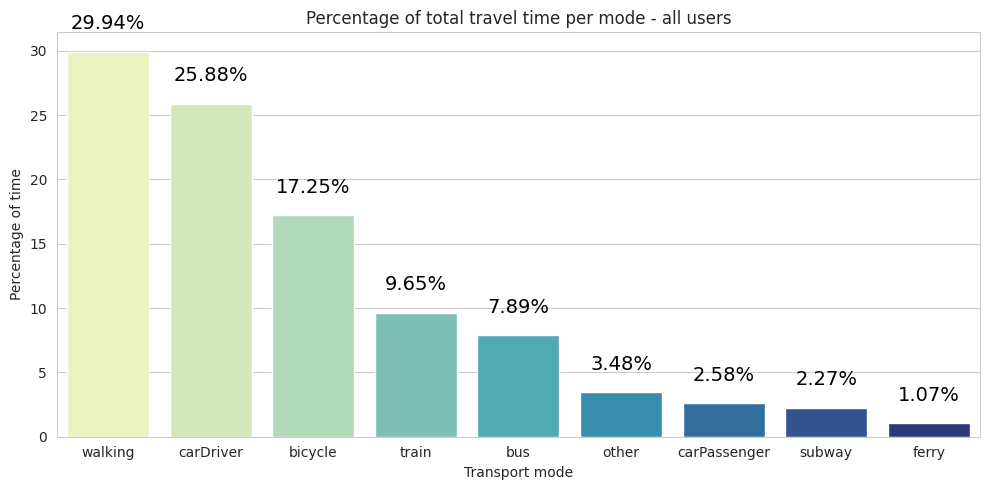

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

def plot_bar_chart_percentage(modetransshare):
    # 1. Environment Setup
    sns.set_style("whitegrid")
    rcParams['figure.figsize'] = 12, 8
    fig, ax = plt.subplots(figsize=(10, 5))

    # 2. Bar Plotting with custom color palette
    green_palette = sns.color_palette("YlGnBu", n_colors=len(modetransshare))
    sns.barplot(data=modetransshare, x="transportMode", y='freq', ax=ax, palette=green_palette)

    # 3. Formatting and Annotating
    ax.set_xlabel('Transport mode')
    ax.set_ylabel('Percentage of time')
    ax.set_title('Percentage of total travel time per mode - all users', y=1.0)
    for p in ax.patches:
        ax.annotate("%.2f%%" % (p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

# To plot, simply call the function:
plot_bar_chart_percentage(modetransshare)


In [10]:
# check the worthwhileness rating basis the mode of transport
worthwhileness_grouped = legs_df.groupby('mot_text')['worthwhileness_rating'].mean().reset_index()
# List of train related modes
train_modes = ['highSpeedTrain', 'intercityTrain', 'train', 'tram']

# Group train modes
worthwhileness_grouped['mot_text'] = worthwhileness_grouped['mot_text'].apply(lambda x: 'train' if x in train_modes else x)

# Group modes with rating less than 1 into 'others'
worthwhileness_grouped['mot_text'] = worthwhileness_grouped.apply(lambda row: 'others' if row['worthwhileness_rating'] < 1 else row['mot_text'], axis=1)
worthwhileness_grouped = worthwhileness_grouped.groupby('mot_text')['worthwhileness_rating'].sum().reset_index()
worthwhileness_grouped['percentage'] = (worthwhileness_grouped['worthwhileness_rating'] / worthwhileness_grouped['worthwhileness_rating'].sum()) * 100


In [22]:
worthwhileness_grouped

,mot_text,worthwhileness_rating,percentage
0,bicycle,2.493524,5.282593
1,bikeSharing,2.378623,5.039172
2,bus,1.497711,3.172938
3,busLongDistance,1.859277,3.938924
4,carDriver,1.682206,3.563796
5,carPassenger,1.994077,4.224501
6,carSharing,1.345238,2.849920
7,carSharingPassenger,3.500000,7.414836
8,electricBike,2.624057,5.559129
9,ferry,1.061088,2.247940


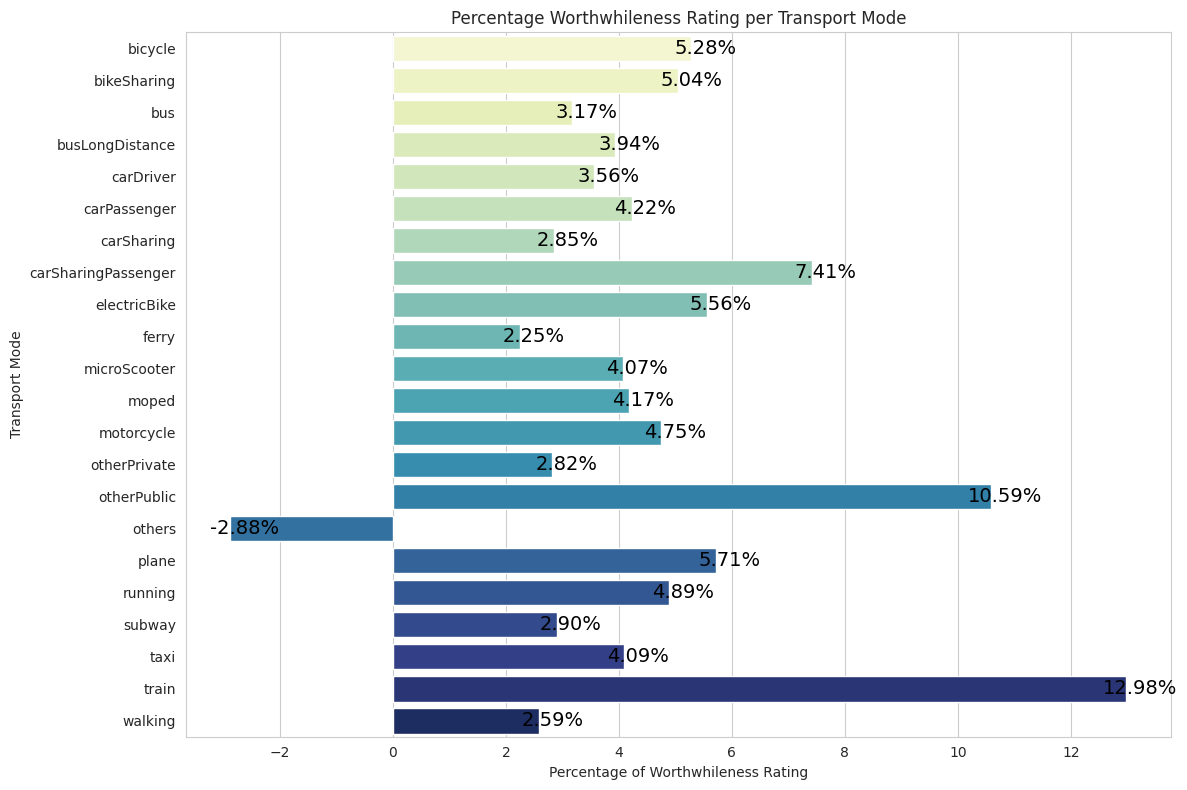

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Define the custom color palette
green_palette = sns.color_palette("YlGnBu", n_colors=len(worthwhileness_grouped))

ax = sns.barplot(data=worthwhileness_grouped, x='percentage', y='mot_text', palette=green_palette)

ax.set_xlabel('Percentage of Worthwhileness Rating')
ax.set_ylabel('Transport Mode')
ax.set_title('Percentage Worthwhileness Rating per Transport Mode')
plt.xticks(rotation=0)  # No rotation for vertical x-axis labels

for p in ax.patches:
    ax.annotate("%.2f%%" % p.get_width(),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=14, color='black',
                xytext=(10, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()


Value of the trip

In [13]:
legs1 = pd.merge(legs_df,worthwhileness_df,on=['tripid','legid'])
legs1.shape

(218864, 18)

In [14]:
# Group by the mode of transport and 'valueFromTrip' and compute the average 'value'
tripvalue_avg = legs1.groupby(['mot_text', 'worthwhileness_element'])['value'].mean().reset_index()

# Filter out entries with 'worthwhileness_element' as 'Unknown'
tripvalue_avg = tripvalue_avg[tripvalue_avg['worthwhileness_element'] != 'Unknown']

# Display the result
print(tripvalue_avg)

tripvalue_avg_pivot = tripvalue_avg.pivot(index='mot_text', columns='worthwhileness_element', values='value')

tripvalue_avg_pivot.sort_index(level=0, ascending=False, inplace=True)

        mot_text worthwhileness_element     value
0        bicycle              Enjoyment  0.965817
1        bicycle                Fitness  1.217783
2        bicycle              Paid_work  0.162525
3        bicycle         Personal_tasks  0.401594
5    bikeSharing              Enjoyment  0.769953
..           ...                    ...       ...
104      unknown         Personal_tasks  0.687256
106      walking              Enjoyment  0.781312
107      walking                Fitness  0.781534
108      walking              Paid_work  0.161927
109      walking         Personal_tasks  0.567769

[100 rows x 3 columns]


In [23]:
tripvalue_avg_pivot.to_csv('tripvalue_avg_pivot.csv')

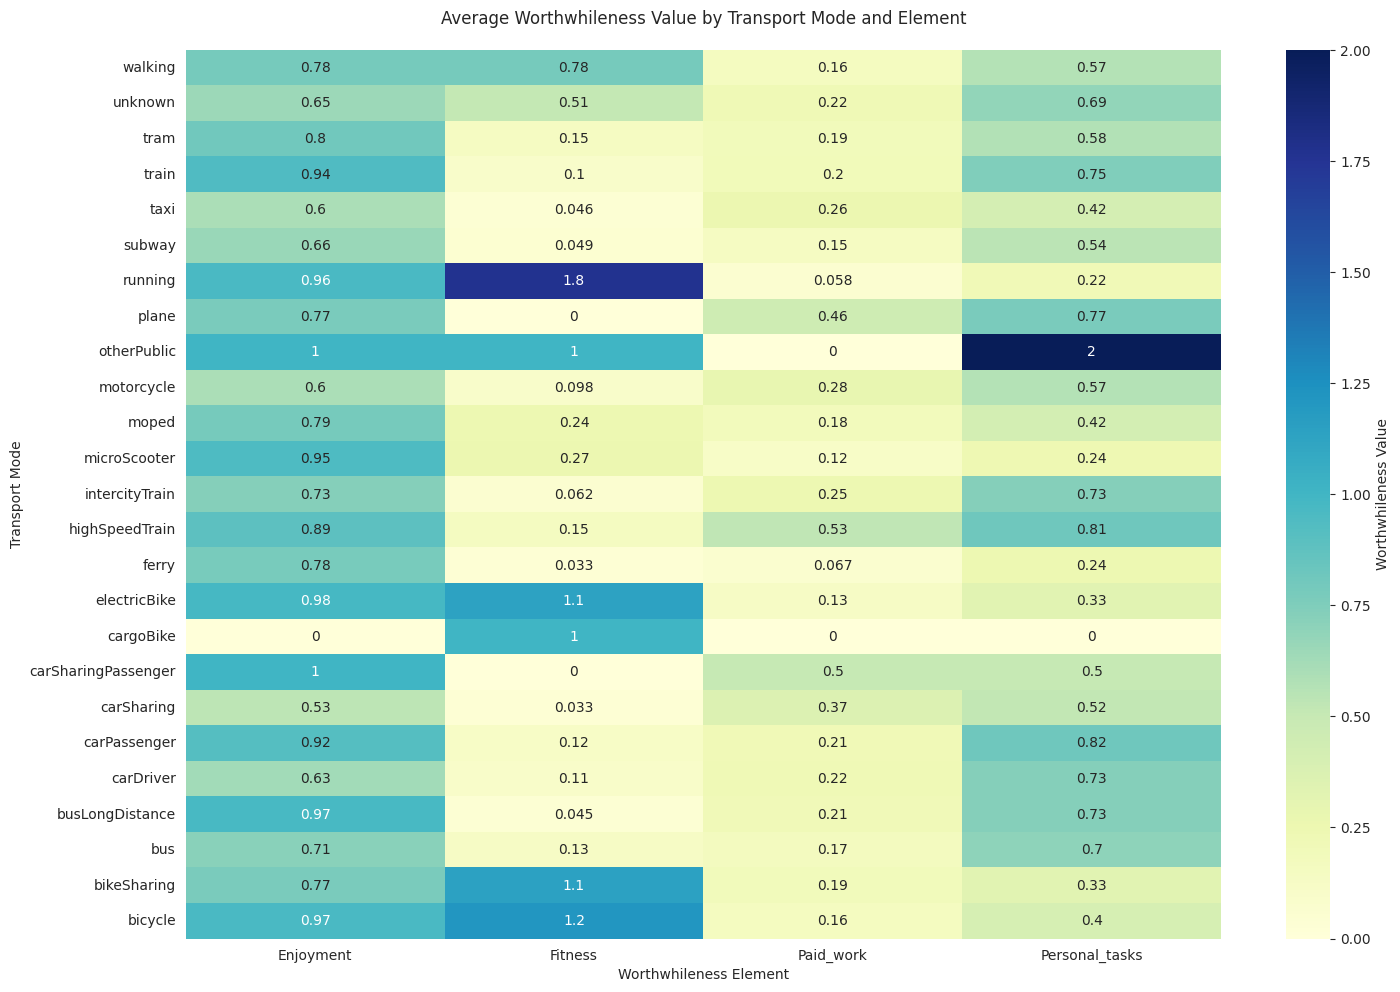

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Draw the heatmap
sns.heatmap(tripvalue_avg_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Worthwhileness Value'})

# Setting the title and labels
plt.title('Average Worthwhileness Value by Transport Mode and Element', y=1.02)
plt.xlabel('Worthwhileness Element')
plt.ylabel('Transport Mode')
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
common_legs = legs1['mot_text'].value_counts().idxmax()
legs_filter = legs1[legs1['mot_text'] == common_legs]
trips_value_all = legs1[['tripid','legid','worthwhileness_element', 'value']]

filtered_legs_tmp = legs_filter[['tripid','legid','mot_text']]
trips_value = pd.merge(trips_value_all, filtered_legs_tmp, on=['tripid','legid'])

trips_value_avg = trips_value.groupby(['mot_text','worthwhileness_element'])['value'].mean().reset_index()
trips_value_avg = trips_value_avg[trips_value_avg['worthwhileness_element'] != 'Unknown']


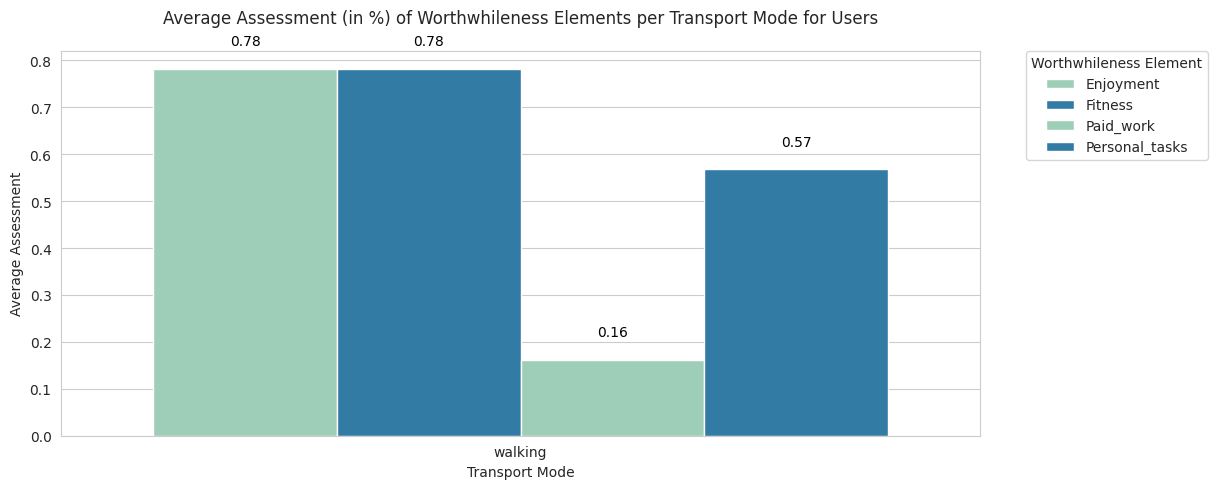

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe
trips_value_avg_common = trips_value_avg[trips_value_avg['mot_text'].isin(['walking', 'car', 'bicycle', 'bus'])]

# Setting up the custom green color palette
green_palette = sns.color_palette("YlGnBu", n_colors=len(trips_value_avg_common['mot_text'].unique()) * 2)

# Setting up the plot
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Plotting the data with the green color palette
ax = sns.barplot(data=trips_value_avg_common, x="mot_text", y='value', hue='worthwhileness_element', palette=green_palette)

ax.set_xlabel('Transport Mode')
ax.set_ylabel('Average Assessment')
ax.set_title('Average Assessment (in %) of Worthwhileness Elements per Transport Mode for Users', pad=20)

# Annotating the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                rotation=0, xytext=(0, 20),
                textcoords='offset points')

# Adjusting the layout and legend
plt.tight_layout()
plt.legend(title='Worthwhileness Element', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()


In [18]:
gen = pd.merge(legs1,users_details_df,on='userid')
gen.shape

(218864, 29)

In [19]:
gen1 = pd.merge(gen,trips_df[['tripid','userid','mood_rating']],on=['tripid','userid'])
gen1.shape

(218864, 30)

In [20]:
# 1. Number of Legs per Trip
trip_leg = (
    gen1.groupby("tripid")
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

# Assuming mood_rating is in gen1 DataFrame
trip_leg = trip_leg.merge(gen1[["tripid", "mood_rating"]], on="tripid", how="left").drop_duplicates()

# 2. Filter Data
trip_leg = trip_leg[(trip_leg.mood_rating > 0) & (trip_leg.mood_rating < 6)]
trip_leg = trip_leg[trip_leg["count"] <= 10]
print(trip_leg.columns)

# Merge with gender data for each trip
trip_leg = trip_leg.merge(gen1[['tripid', 'gender', 'age_range', 'campaign']], on='tripid', how='left').drop_duplicates()

Index(['tripid', 'count', 'mood_rating'], dtype='object')


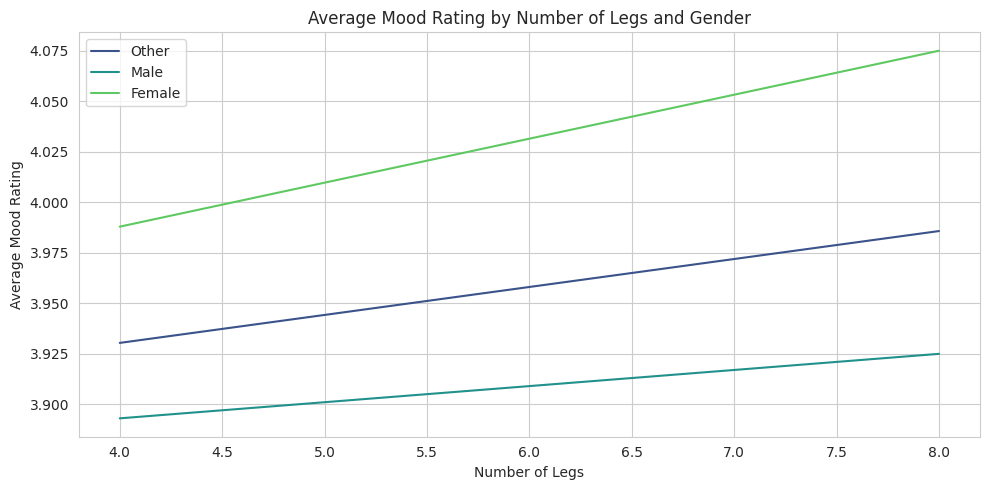

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Average Mood Plots
trip_leg_avg = trip_leg.groupby("count")["mood_rating"].mean().reset_index(name="all_avg")

# male
male_avg = trip_leg[trip_leg.gender == "Male"].groupby("count")["mood_rating"].mean().reset_index(name="male_avg")
trip_leg_avg = trip_leg_avg.merge(male_avg, on="count")

# female
female_avg = trip_leg[trip_leg.gender == "Female"].groupby("count")["mood_rating"].mean().reset_index(name="female_avg")
trip_leg_avg = trip_leg_avg.merge(female_avg, on="count")

# Setting up the plot
plt.figure(figsize=(10, 5))
sns.set_palette("viridis", n_colors=3)  # Green color palette

# Plotting the data
plt.plot(trip_leg_avg["count"], trip_leg_avg.all_avg, label="Other")
plt.plot(trip_leg_avg["count"], trip_leg_avg.male_avg, label="Male")
plt.plot(trip_leg_avg["count"], trip_leg_avg.female_avg, label="Female")
plt.legend()
plt.xlabel("Number of Legs")
plt.ylabel("Average Mood Rating")
plt.title("Average Mood Rating by Number of Legs and Gender")
plt.tight_layout()
plt.show()


In [25]:
trip_leg_avg
# trip_leg_avg.male_avg
# trip_leg_avg.female_avg


,count,all_avg,male_avg,female_avg
0,4,3.930416,3.893085,3.987933
1,8,3.985765,3.925000,4.075000


In [3]:
import pandas as pd

legs_df['start_date'] = pd.to_datetime(legs_df['start_date'])
legs_df.set_index('start_date', inplace=True)

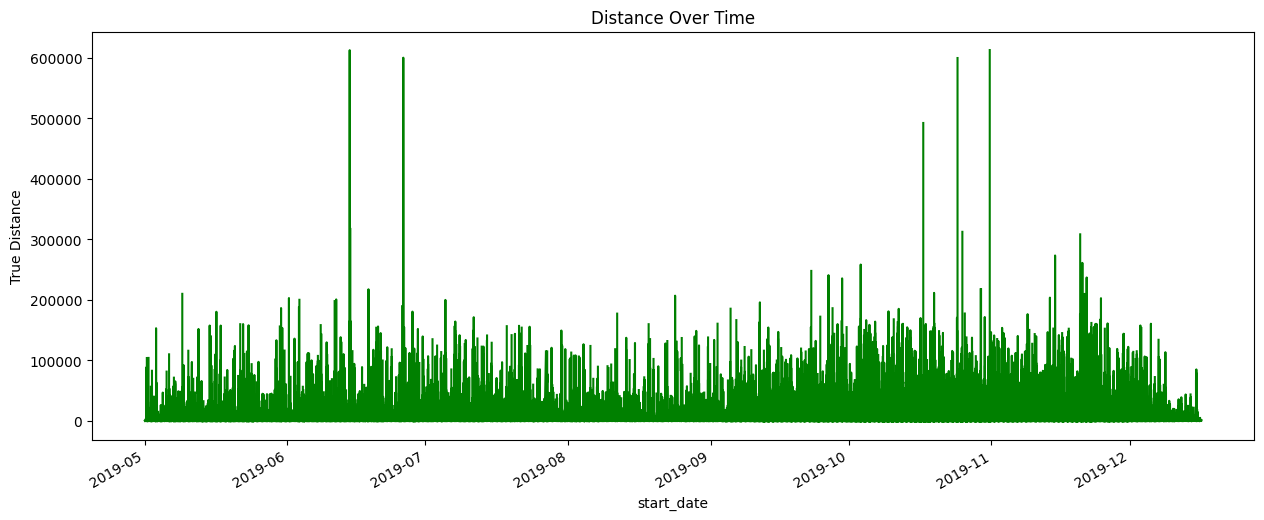

In [4]:
import matplotlib.pyplot as plt

legs_df['true_distance'].plot(figsize=(15, 6), color='green')
plt.title('Distance Over Time')
plt.ylabel('True Distance')
plt.show()


<ipython-input-5-3ee515809798>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = legs_df.resample('D').mean()


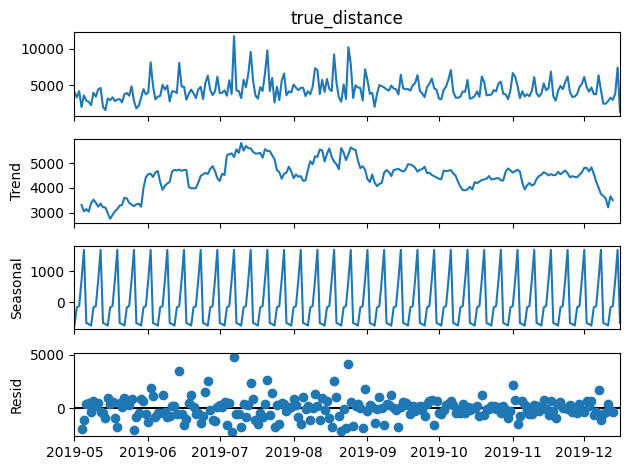

In [5]:
# Resample to daily data
daily_data = legs_df.resample('D').mean()

#performing time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(daily_data['true_distance'], model='additive')
decomposed.plot()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_data['true_distance'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -3.0007659730028036
p-value: 0.03482292992582181


In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

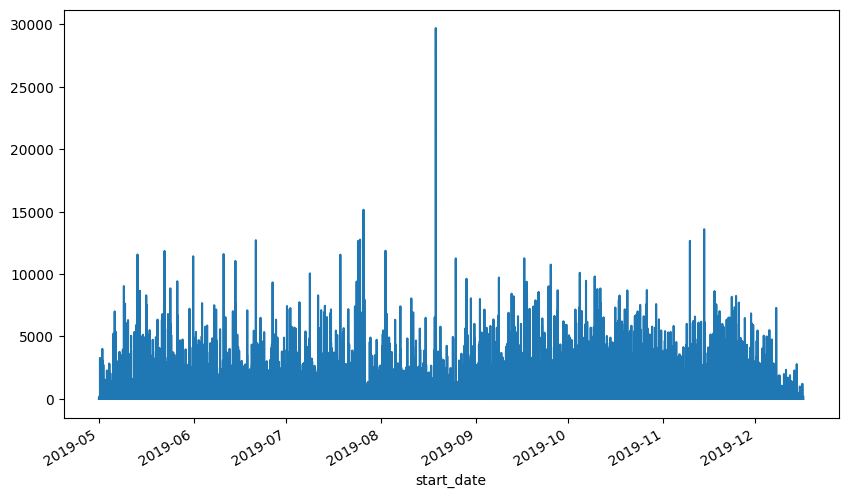

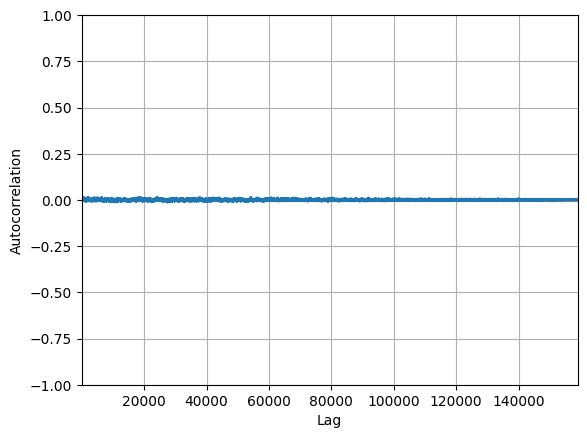

In [9]:
# Let's say you're interested in forecasting 'leg_duration' (or any other column)
legs_df['leg_duration'].plot(figsize=(10,6))
plt.show()

autocorrelation_plot(legs_df['leg_duration'])
plt.show()

In [10]:
# Sort dataframe by date
legs_df.sort_index(inplace=True)

# Resample data to daily frequency (fill missing data with NaN)
# You can adjust the frequency (e.g., 'H' for hourly) as per your data.
legs_df_resampled = legs_df.resample('D').mean()


<ipython-input-10-b0caa81e11b6>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  legs_df_resampled = legs_df.resample('D').mean()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Use the resampled data
p, d, q = 5, 0, 1
model = ARIMA(legs_df_resampled['leg_duration'], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           leg_duration   No. Observations:                  230
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1174.978
Date:                Wed, 23 Aug 2023   AIC                           2365.955
Time:                        00:43:55   BIC                           2393.460
Sample:                    05-01-2019   HQIC                          2377.050
                         - 12-16-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5810     36.499      3.002      0.003      38.044     181.118
ar.L1          0.9880      0.112      8.814      0.000       0.768       1.208
ar.L2         -0.0565      0.076     -0.743      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


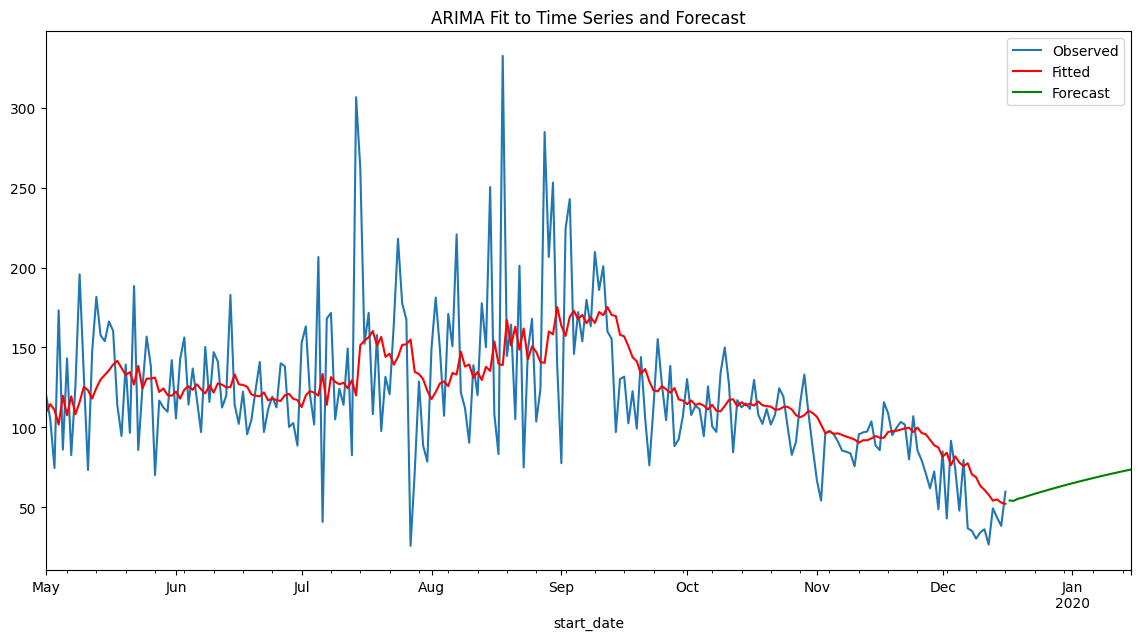

In [12]:

import matplotlib.pyplot as plt

# 1. Plot the original data
legs_df_resampled['leg_duration'].plot(label='Observed', figsize=(14, 7))

# 2. Plot the fitted values
model_fit.fittedvalues.plot(label='Fitted', color='red')

# 3. Forecast for a specific number of periods ahead (e.g., 30 days)
forecast_periods = 30
forecast = model_fit.forecast(steps=forecast_periods)
forecast.plot(label='Forecast', color='green')

plt.title('ARIMA Fit to Time Series and Forecast')
plt.legend()
plt.show()


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data/mood_data.csv')
data.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'average_speed', 'max_speed', 'distance', 'duration',
       'mood_rating', 'did_you_have_to_arrive', 'how_often', 'manual_start',
       'manual_end', 'validation_date', 'os', 'os_version', 'model', 'gender',
       'age_range', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household'],
      dtype='object')

In [8]:
weather_legs_df.columns

Index(['weatherid', 'legid', 'request_timestamp', 'city', 'centroid_x',
       'centroid_y', 'country', 'timestamp_seconds', 'timestamp_string',
       'date', 'weather_id', 'weather_scenario', 'weather_main',
       'weather_description', 'weather_icon', 'temp', 'temp_min', 'temp_max',
       'temp_kf', 'apparent_temperature', 'net_radiation',
       'temperature_category', 'temperature_description', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'clouds_all', 'cloud_category',
       'cloud_main', 'precipitation_category', 'precipitation_main',
       'wind_speed', 'wind_deg', 'wind_beaufort_number', 'wind_category',
       'wind_description', 'sys_pod'],
      dtype='object')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets
merged_df = pd.merge(data, weather_legs_df[['legid','weather_scenario']], on = 'legid')

# Group by weather scenario and calculate average mood rating
average_mood = merged_df.groupby('weather_scenario')['mood_rating'].mean().sort_values(ascending=False)




In [17]:
merged_df.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'average_speed', 'max_speed', 'distance', 'duration',
       'mood_rating', 'did_you_have_to_arrive', 'how_often', 'manual_start',
       'manual_end', 'validation_date', 'os', 'os_version', 'model', 'gender',
       'age_range', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household',
       'weather_scenario'],
      dtype='object')

In [15]:
average_mood

weather_scenario
['rainy/snowy', 'uncomfortable temperature']    4.246988
['rainy/snowy', 'warm']                         3.950100
['cloudy', 'warm']                              3.878899
['cloudy', 'cold']                              3.705924
['uncomfortable temperature']                   3.658435
['cold']                                        3.599984
['warm']                                        3.578259
['cloudy']                                      3.550392
['cloudy', 'windy']                             3.548150
['neutral/good']                                3.482888
['rainy/snowy']                                 2.842105
['cloudy', 'cold', 'windy']                     2.628094
['cold', 'windy']                               2.497319
['windy']                                       2.322148
['rainy/snowy', 'windy']                        2.133333
['warm', 'windy']                              -0.826087
['cloudy', 'warm', 'windy']                    -1.000000
Name: mood_rat

In [18]:
import pandas as pd

# Assuming you have loaded the dataset into a dataframe called `df`
grouped = merged_df.groupby('weather_scenario')['userid'].nunique()

# To get percentages:
grouped_percentage = (grouped / grouped.sum()) * 100

print(grouped_percentage)


weather_scenario
['cloudy', 'cold', 'windy']                      1.409374
['cloudy', 'cold']                              18.551295
['cloudy', 'warm', 'windy']                      0.032776
['cloudy', 'warm']                               1.212717
['cloudy', 'windy']                              8.915110
['cloudy']                                      13.962635
['cold', 'windy']                                0.557194
['cold']                                        13.372665
['neutral/good']                                16.388069
['rainy/snowy', 'uncomfortable temperature']     0.589971
['rainy/snowy', 'warm']                          0.753851
['rainy/snowy', 'windy']                         0.131105
['rainy/snowy']                                  0.065552
['uncomfortable temperature']                   10.390036
['warm', 'windy']                                0.065552
['warm']                                        12.979351
['windy']                                        0.6227

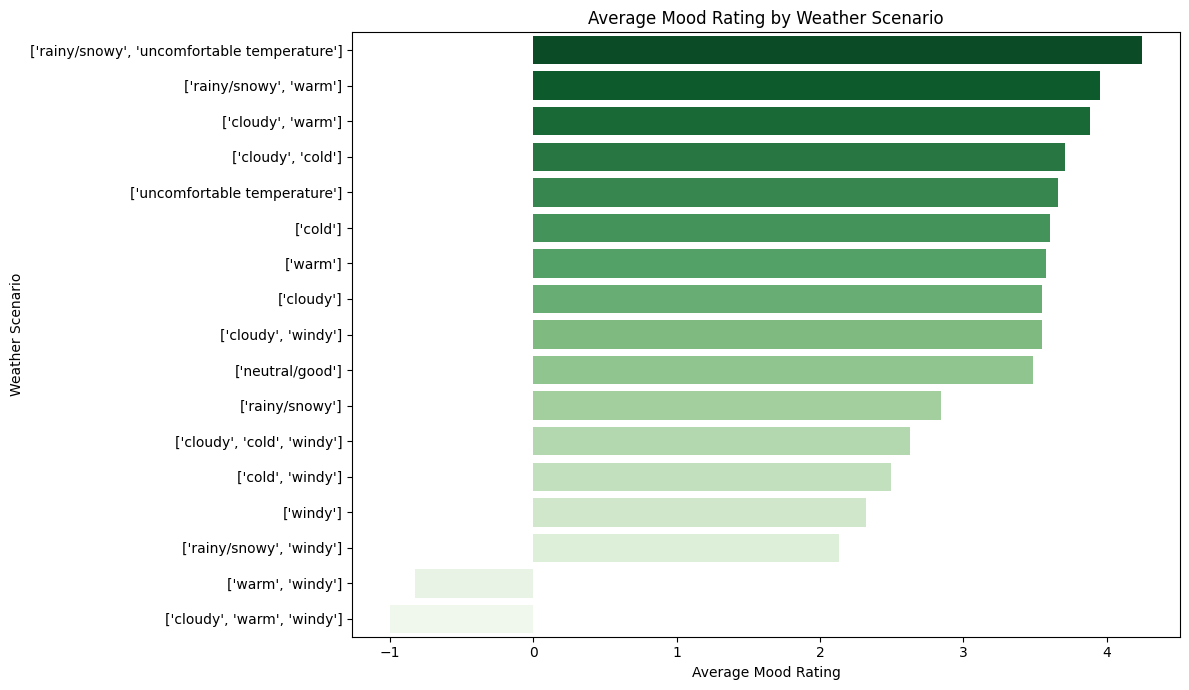

In [13]:
# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(y=average_mood.index, x=average_mood.values, palette="Greens_r")
plt.title('Average Mood Rating by Weather Scenario')
plt.ylabel('Weather Scenario')
plt.xlabel('Average Mood Rating')
plt.tight_layout()
plt.show()

In [19]:
# 1. Filter out the top 5 modes of transport
top_5_transports = merged_df['transport_category'].value_counts().nlargest(5).index
filtered_df = merged_df[merged_df['transport_category'].isin(top_5_transports)]

# 2. Grouping
grouped_data = filtered_df.groupby(['weather_scenario', 'transport_category'])['worthwhileness_rating'].mean().reset_index()


In [22]:
grouped_data

,weather_scenario,transport_category,worthwhileness_rating
0,"['cloudy', 'cold', 'windy']",cycling_emerging_micromobility,0.849246
1,"['cloudy', 'cold', 'windy']",private_motorized,1.043599
2,"['cloudy', 'cold', 'windy']",public_transp_long_dist,0.762238
3,"['cloudy', 'cold', 'windy']",public_transp_short_dist,0.573248
4,"['cloudy', 'cold', 'windy']",walking,0.577243
...,...,...,...
73,['windy'],cycling_emerging_micromobility,2.875824
74,['windy'],private_motorized,0.600000
75,['windy'],public_transp_long_dist,-1.000000
76,['windy'],public_transp_short_dist,1.230769


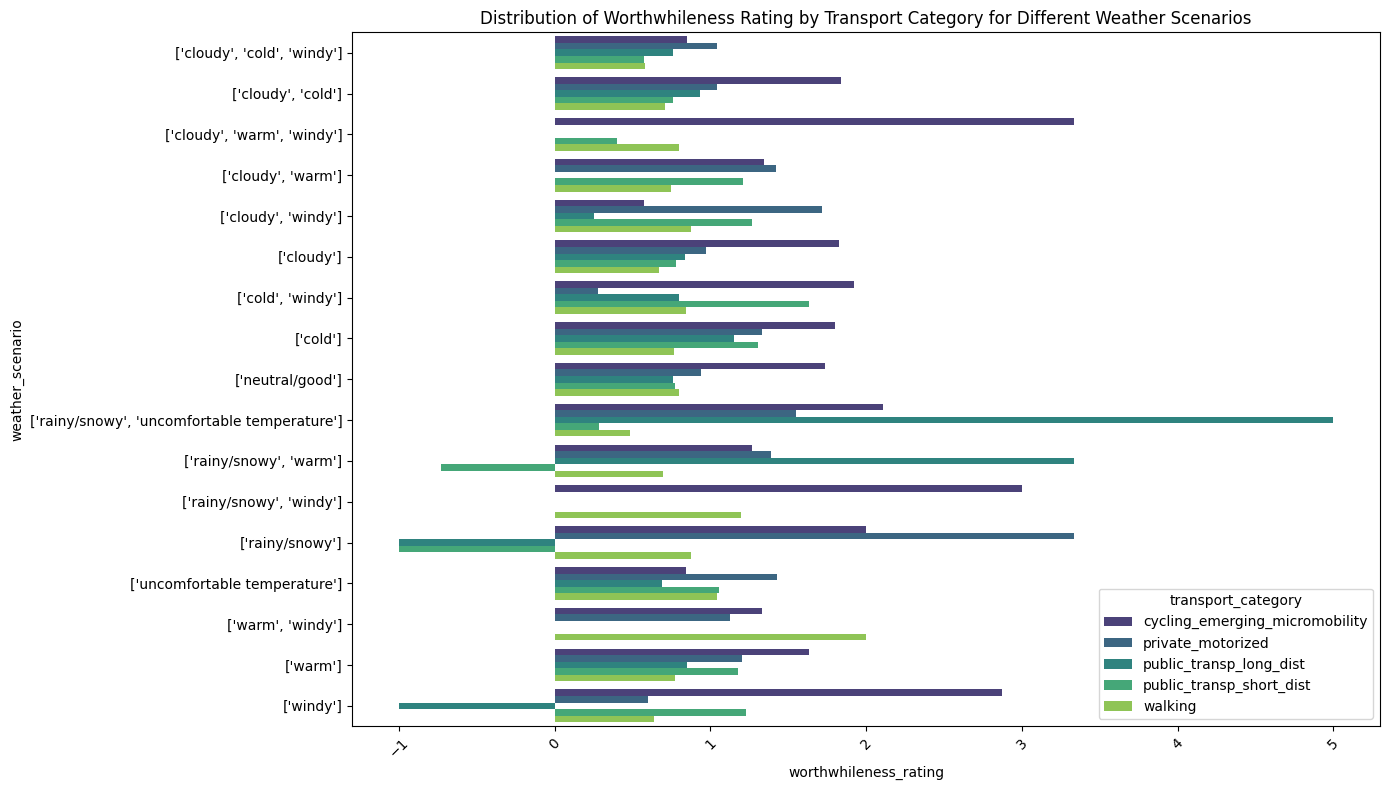

In [21]:
# 3. Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, y='weather_scenario', x='worthwhileness_rating', hue='transport_category', palette="viridis")
plt.title('Distribution of Worthwhileness Rating by Transport Category for Different Weather Scenarios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()